# 01-06 Histograms and scatter plots

In [1]:
# closer look at daily returns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from DataHelper import DataHelper

In [2]:
# measure of kurtosis is measure of how much different distribution of normal distribution
# fat tails -> frequently large excursions from std, positive kurtosis
# negative kurtosis would have few, skinny tails

data = DataHelper.GetPriceHistory(['AAPL', 'IBM', 'XOM', 'GLD'], '2005-01-01', '2016-01-01')

In [3]:
spy = data['SPY']

### Histograms

mean 0.0002686586648141772
std 0.014084639643604827
kurtosis 13.5992074846 positive value means fat tails
kurtosis XOM 13.3250541232


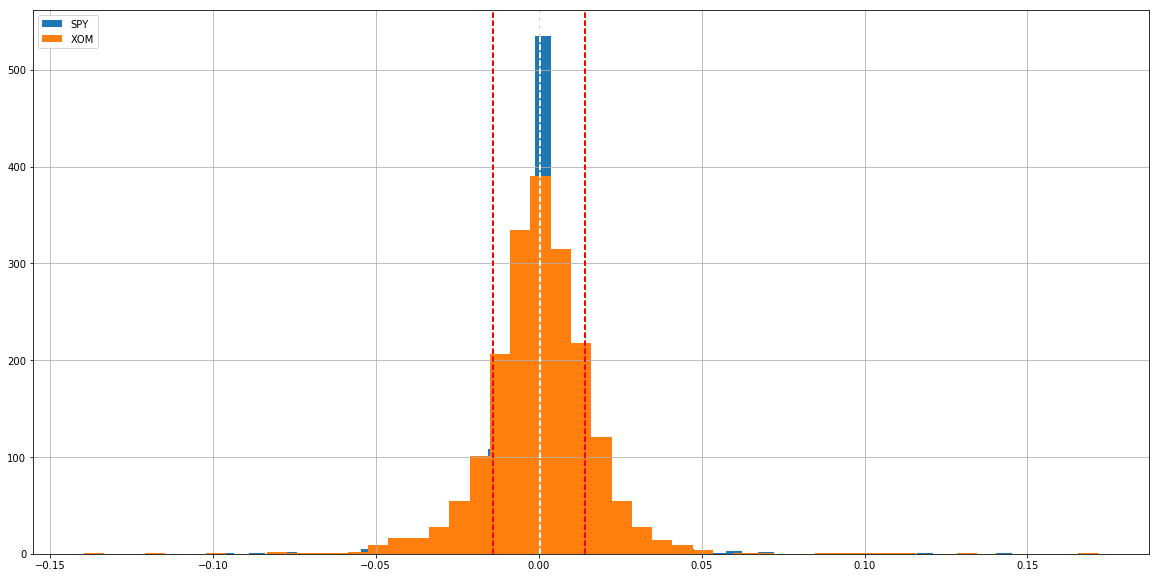

In [4]:
# histogram with mean/std lines
dailyAll = DataHelper.compute_daily_returns(data)
daily = dailyAll['SPY']
plt.figure(figsize=(20,10))
ax = daily.hist(bins=50, label='SPY')
dailyAll['XOM'].hist(bins=50, label='XOM')
mean= daily.mean()
std = daily.std()
print('mean', mean)
print('std', std)
print('kurtosis', daily.kurtosis(), 'positive value means fat tails')
print('kurtosis XOM', dailyAll['XOM'].kurtosis())
plt.axvline(mean, color='w', linestyle='dashed', linewidth=2)
plt.axvline(std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)
ax.legend(loc='upper left')
plt.show()

### Scatterplots

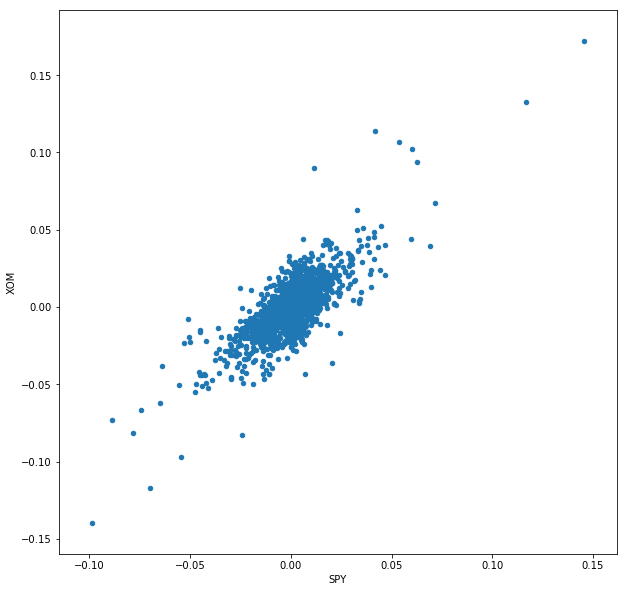

In [5]:
dailyAll.plot(kind='scatter', x='SPY', y='XOM', figsize=(10,10))
plt.show()

##### Beta vs Alpha vs Correlation

In [6]:
# Fitting A Line to Data Points
# Beta is Slope
# where line intersects vertical axis is alpha

# slope DOES NOT EQUAL correlation
# correlation is measure of how tightly those data points fit the line

beta_XOM,alpha_XOM=np.polyfit(dailyAll['SPY'],dailyAll['XOM'],1)
print("XOM beta:",beta_XOM)
print("XOM alpha:",alpha_XOM)

XOM beta: 0.974098692074
XOM alpha: 0.000276192950047


In [7]:
import statsmodels.api as sm
def linereg(X,Y):
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    return model.fit()

result = linereg(dailyAll['SPY'], dailyAll['XOM'])
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    XOM   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     3115.
Date:                Thu, 22 Jun 2017   Prob (F-statistic):               0.00
Time:                        21:29:45   Log-Likelihood:                 6025.9
No. Observations:                1939   AIC:                        -1.205e+04
Df Residuals:                    1937   BIC:                        -1.204e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0003      0.000      1.124      0.261        -0.000     0.001
SPY            0.9741      0.017     55.809      0.000         0.940     1.008
==============================================================================
Omnibus:                      211.408   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1754.498
Skew:                           0.099   Prob(JB):                         0.00
Kurtosis:                       7.656   Cond. No.                         71.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

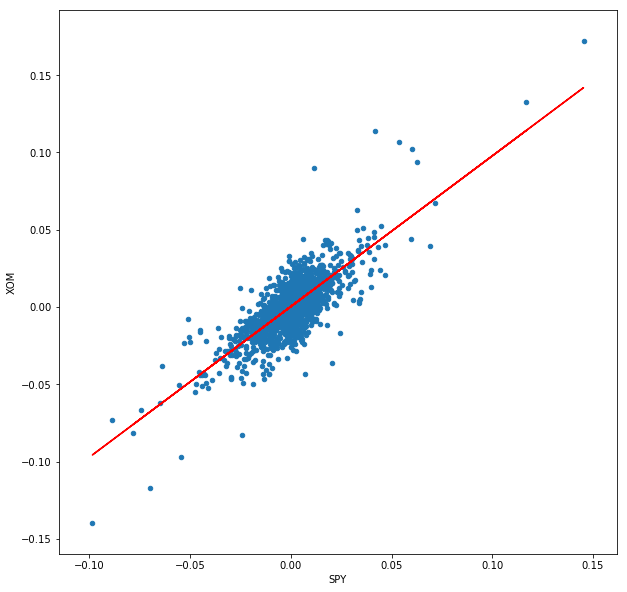

In [8]:
# plot line
dailyAll.plot(kind='scatter', x='SPY', y='XOM', figsize=(10,10))
plt.plot(dailyAll['SPY'], beta_XOM*dailyAll['SPY'] + alpha_XOM, '-', color='r')
plt.show()

In [9]:
# calculate correlation coefficient
print(dailyAll.corr(method='pearson'))

           SPY      AAPL       IBM       XOM       GLD
SPY   1.000000  0.577590  0.724129  0.785213  0.065546
AAPL  0.577590  1.000000  0.497816  0.407042 -0.024050
IBM   0.724129  0.497816  1.000000  0.536355  0.020956
XOM   0.785213  0.407042  0.536355  1.000000  0.191326
GLD   0.065546 -0.024050  0.020956  0.191326  1.000000


In [10]:
# created helper functions in DataHelper for beta/linear regression
print('beta',DataHelper.get_beta(dailyAll['SPY'], dailyAll['GLD']))
DataHelper.get_linereg(dailyAll['SPY'], dailyAll['GLD']).summary()

beta 0.061854344754


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GLD   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     8.358
Date:                Thu, 22 Jun 2017   Prob (F-statistic):            0.00388
Time:                        21:29:45   Log-Likelihood:                 5631.1
No. Observations:                1939   AIC:                        -1.126e+04
Df Residuals:                    1937   BIC:                        -1.125e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0008      0.000      2.570      0.010         0.000     0.001
SPY            0.0619      0.021      2.891      0.004         0.020     0.104
==============================================================================
Omnibus:                      231.502   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2281.828
Skew:                          -0.051   Prob(JB):                         0.00
Kurtosis:                       8.313   Cond. No.                         71.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
dailyAll['GLD'].kurtosis()

5.1833103986614226

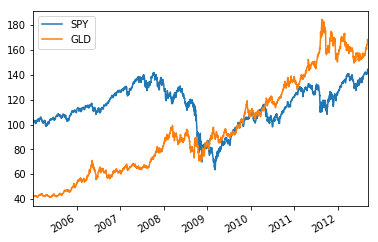

In [13]:
data['SPY'].plot(label='SPY')
ax = data['GLD'].plot(label='GLD')
ax.legend()
plt.show()